# Artificial Intelligence
## UEMH3073 / UECS2053 / UECS2153

# Lab 2: Genetic Algorithm

This notebook is an assignment requiring you to investigate the Travelling Salesman Problem. Guidance is provided so you can understand what needs to be done for this assignment as you follow through this lab. Convenience classes and functions/ methods are provided.

You will encounter #TODO in the code cells explaining tasks you need to complete. In other words, you will need to write codes and accomplish the #TODO tasks so that the genetic algorithm functions well and runs correctly. Look for "Replacement starts here" and "Replacement ends here" to know the parts of the codes requiring your inputs.
    

The #TODO tasks and their marks distribution are as follows:
 
a. #TODO1 (10 marks) in the Population Initialization function. You will read a set of cities from the filename when creating an initial population. 

b. #TODO2 (10 marks) in the Parent Selection function. You will replace a dummy parent selection function with Tournament Selection. 

c. #TODO3 (10 marks) in the Parent Selection function. You will replace a dummy parent selection function with Proportional Selection.

d. #TODO4 (10 marks) in the Survival Selection function. You will replace the dummy survival selection function with Merge, Sort & Truncate. 
    
e. #TODO5 (10 marks) in the Crossover function. You will replace the dummy crossover function the Partially Mapped Crossover approach.

f. #TODO6 (10 marks) in the Mutation function. You will replace the dummy mutation function with Insertion Mutation approach. 

g. #TODO7 (10 marks) in Performance Evaluation. You will present performance evaluation for the different Parent Selection functions. 

Marks are also given for: Report Presentation and Formatting (15%) and Code Quality and Comments (15%). More details about this notebook and assignemnt are provided in your lab sheet.

## An Overview of the Travelling Salesman Problem

In the travelling salesman problem, a salesperson wish to find the shortest path that passes through all cities s/he wishes to visit given the coordinates of a set of cities. The salesperson should visit each of the cities once only, and so:

a. Each path consists all cities in the set.

b. Each path visits each of the cities once only. So, none of the cities are visited more than once. 

## Imports

In [4]:
%matplotlib inline

# Please add more imports if you need them 

import random
import time
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pprint import pprint as print 

## Convenience Classes

### City

The City class, which represents a city, possesses the properties of the city and has functions/ methods used for calculating the distance between the city and another city. Each path, represented by a chromosome, is formed by a set of cities.   

In [5]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

### Fitness

The Fitness class, which represents the fitness function, possesses the properties of a path and has functions/methods used for calculating the fitness value of the path, which is based on the distance of the path. 

In [6]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = None
        self.fitness = None
    
    def routeDistance(self):
        if self.distance == None:
            pathDistance = 0.0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i+1 < len(self.route):
                    toCity = self.route[i+1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == None:
        # Fitness function (Simple division) that uses a simple 
        # division that divides one by the distance of the path
            self.fitness = 1 / float(self.routeDistance()) 
            # Note: You must ensure a division by zero does not occur 
        return self.fitness


## Population Initialization  

The population initialization function (or method) performs random initialization. This creates an initial population with completely random chromosomes (or solutions). There are three functions related to population initialization. 

The first function is genCityList() which generates a set of cities from a file.  

In [7]:
def genCityList(filename):
    cityList = []
    
    # TODO 1 (10 marks) - Replace the following codes that generate 10 random cities.
    # Your new implementation must read a set of cities from the filename to be used for creating 
    # an initial population.  
    
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors with slight effects on the fitness value.
    # >0 to <5 marks: Major errors with significant effects on the fitness value. 
    # 0 marks:        No answer is given. 
    
    # -------------- Replacement starts here  ----------------

    # Read the cities from the file
    with open(filename, 'r') as file:  
        
        # Skip the header
        next(file)  

        for line in file:

            # Split X and Y coordinates
            row = line.strip().split(',')  

             # 1st column in list is ignored, 2nd and 3rd columns are x and y coordinates
            cityList.append(City(x=int(row[1]),y=int(row[2]))) 
    
    # --------------- Replacement ends here -----------------
    
    return cityList


The second function is createRoute() which generates a random route (chromosome) from a set of City instances.

In [8]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))  # Randomly shuffle the entire list
    return route

The third function is initialPopulation() which calls the second function repeatedly to create an initial population (a list of routes).

In [9]:
def initialPopulation(popSize, cityList):
    population = []
    for i in range(0, popSize):
        population.append(createRoute(cityList))  # Call createRoute to shuffle the list
    return population

You can run the above functions using the sample runs below. To do so, simply change the cell type from Markdown to Code.

`Sample run 1` initializes 10 cities in cityList as follows:

In [10]:
cityList = genCityList("C:\\Users\\User\\Desktop\\Jupyter NoteBook\\AI_Week 7_Practical\\Lab_2_Genetic_Algorithm\\cities500.txt") 
print(cityList)

[(70,41),
 (92,36),
 (85,33),
 (69,78),
 (83,21),
 (90,58),
 (23,23),
 (37,45),
 (74,98),
 (77,29),
 (10,71),
 (98,26),
 (69,80),
 (51,47),
 (96,57),
 (22,73),
 (47,92),
 (68,1),
 (51,97),
 (13,37),
 (54,65),
 (52,65),
 (4,24),
 (56,5),
 (37,33),
 (96,59),
 (70,93),
 (78,94),
 (58,88),
 (77,16),
 (75,93),
 (86,64),
 (55,3),
 (93,27),
 (14,12),
 (62,13),
 (39,40),
 (76,4),
 (22,71),
 (33,49),
 (28,98),
 (53,51),
 (48,43),
 (14,41),
 (46,83),
 (61,14),
 (56,77),
 (37,17),
 (9,52),
 (57,71),
 (91,8),
 (35,67),
 (85,18),
 (90,94),
 (7,74),
 (62,62),
 (35,55),
 (96,87),
 (57,30),
 (6,73),
 (47,99),
 (56,15),
 (69,43),
 (30,45),
 (88,17),
 (49,34),
 (88,65),
 (30,22),
 (45,26),
 (72,66),
 (4,36),
 (7,26),
 (64,15),
 (45,71),
 (84,0),
 (74,71),
 (42,58),
 (50,87),
 (76,63),
 (51,79),
 (15,72),
 (38,99),
 (10,4),
 (80,100),
 (58,38),
 (91,55),
 (27,0),
 (66,13),
 (89,72),
 (92,95),
 (64,48),
 (29,79),
 (12,92),
 (2,82),
 (71,15),
 (85,53),
 (26,23),
 (48,35),
 (68,60),
 (10,89),
 (40,80),
 (46

`Sample run 2` initializes 10 cities in cityList and creates a population with three routes as follows:

In [11]:
cityList = genCityList("C:\\Users\\User\\Desktop\\Jupyter NoteBook\\AI_Week 7_Practical\\Lab_2_Genetic_Algorithm\\cities500.txt") 
population = initialPopulation(3, cityList)  # 3 different routes, randomly shuffled from the list
print(population)

[[(35,42),
  (84,30),
  (76,54),
  (2,98),
  (4,57),
  (6,73),
  (25,75),
  (79,36),
  (89,5),
  (70,16),
  (88,65),
  (27,75),
  (85,100),
  (54,7),
  (92,75),
  (10,34),
  (41,18),
  (35,91),
  (61,15),
  (54,74),
  (14,12),
  (3,66),
  (96,87),
  (98,67),
  (85,53),
  (89,31),
  (45,26),
  (39,4),
  (9,37),
  (67,36),
  (84,5),
  (92,19),
  (57,81),
  (2,24),
  (98,61),
  (15,6),
  (78,60),
  (37,17),
  (7,46),
  (34,83),
  (26,90),
  (26,39),
  (3,27),
  (90,58),
  (100,89),
  (96,59),
  (55,33),
  (0,51),
  (12,22),
  (56,15),
  (73,68),
  (94,40),
  (52,81),
  (49,34),
  (37,45),
  (15,92),
  (96,57),
  (9,55),
  (69,78),
  (59,1),
  (91,13),
  (44,29),
  (13,37),
  (23,23),
  (52,35),
  (60,60),
  (1,1),
  (60,92),
  (4,70),
  (47,99),
  (42,87),
  (6,72),
  (4,3),
  (41,97),
  (45,86),
  (95,71),
  (93,30),
  (92,19),
  (51,67),
  (46,57),
  (98,49),
  (61,21),
  (68,40),
  (93,27),
  (60,35),
  (4,72),
  (21,52),
  (45,72),
  (58,21),
  (73,53),
  (76,88),
  (4,21),
  (10,31),

## Selection

Parents selection selects chromosomes with high fitness values from a population. Survivor selection selects chromosomes with higher fitness values to form the population of the next generation. The population size is len(population), so we have len(population) in this population. 

### Parent Selection

There are three implementations for parent selection. The first parentSelection() performs **random** selection.

In [12]:
def parentSelection(population, poolSize=None):
    if poolSize == None:
        poolSize = len(population)
        
    matingPool = []
    
    for i in range(0, poolSize):
        fitness = Fitness(population[i]).routeFitness()  # Calc. fitness but not use it
        matingPool.append(random.choice(population))
      
    return matingPool

The second parentSelection() performs **Tournament** Selection.

In [13]:
def parentSelection(population, poolSize=None):
    
    # TODO 2 (10 marks) - Replace the dummy parent selection function below with  
    # Tournament Selection.
      
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
    
    # You will need to compare the performance achieved by Random Selection, 
    # Tournament Selection, and Proportional Selection during performance evaluation 
    # later. So, you will run either Random Selection, Tournament Selection, or 
    # Proportional Selection in a simulation run.
    
    if poolSize == None:
        poolSize = len(population)
        
    matingPool = []
    
    # ---------------- Replacement starts here ----------------
    
    # Tournament Selection
    for i in range(0, poolSize):
        # Random pick 3 from population
        tournament = random.sample(population, 3)  

        # Assume the first one is the best
        best = tournament[0]

        for j in range(1, 3):

            # Compare the rest with current best one based on their fitness value
            if Fitness(tournament[j]).routeFitness() > Fitness(best).routeFitness():
                
                # The route with better fitness value is chosen as best route
                best = tournament[j]
                
        matingPool.append(best)
    
    # ---------------- Replacement ends here ----------------
    
    return matingPool

The third parentSelection() performs **Proportional** Selection.

In [14]:
def parentSelection(population, poolSize=None):
    
    # TODO 3 (10 marks) - Replace the dummy parent selection function below with  
    # Proportional Selection.
      
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
    
    # You will need to compare the performance achieved by Random Selection, 
    # Tournament Selection, and Proportional Selection during performance evaluation 
    # later. So, you will run either Random Selection, Tournament Selection, or 
    # Proportional Selection in a simulation run.
    
    if poolSize == None:
        poolSize = len(population)
        
    matingPool = []
    chromosome_fitness = []
    sumfitness = 0.0
    
    # ---------------- Replacement starts here ----------------

    for i in range(0, len(population)):
        # Calculate fitness of each route and put into a list
        chromosome_fitness.append(Fitness(population[i]).routeFitness()) 

        # Sum the fitness of each route in the population to obtain the total fitness value
        sumfitness += Fitness(population[i]).routeFitness() 

    # This loop determines number of routes selected as parent
    for j in range(0, poolSize):

        # Randomly choose a number between 0 to total fitness
        choice = random.uniform(0, sumfitness)
        cumulative_fitness = 0

        for k in range(0, len(population)):

            if cumulative_fitness <= choice:

                # Cumultive fitness of each route is added until it is larger than the randomly selected number
                cumulative_fitness += chromosome_fitness[k] 

                if cumulative_fitness >= choice:

                    # The k th route in the population is chosen as parent once cumulative fitness value exceed the random value chosen
                    matingPool.append(population[k])

                    # Breaks from the loop once a route is selected
                    break 

    # ---------------- Replacement ends here ----------------
    
    return matingPool

### Survival Selection

In [15]:
def survivorSelection(population, eliteSize):
    
    # TODO 4 (10 marks) - Replace the dummy survival selection function below with  
    # Merge, Sort & Truncate.
      
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
    
    elites = []
    
    # ---------------- Replacement starts here ----------------

    # Merge Parent & Children

    # Sort the population based on fitness score in descending order.
    sortedPopulation = sorted(population, key=lambda x: Fitness(x).routeFitness(), reverse=True)

    # sorted() = a function that returns a new sorted list
    # population = the list to be sorted
    # Fitness (x).routeFitness() =  use Fitness class with x as its input, then calculates the fitness score for the route.
    # reverse = True --> sort the list in descending order (high fitness score is the first in list)

    # Select the top eliteSize routes as elites
    elites = sortedPopulation[:eliteSize]

    # [:eliteSize] = slice the first eliceSize elements
    
    # ---------------- Replacement ends here ----------------

    return elites

You can run the above functions using the sample runs below. To do so, simply change the cell type from Markdown to Code. 

`Sample run 1` initializes 10 cities in cityList, creates a population with four routes, and creates a pool of parents as follows:

In [16]:
population = initialPopulation(4, genCityList("C:\\Users\\User\\Desktop\\Jupyter NoteBook\\AI_Week 7_Practical\\Lab_2_Genetic_Algorithm\\cities500.txt"))
print('Initial population') 
print(population)

matingpool = parentSelection(population, 4) 
print('Mating pool')
print(matingpool)

'Initial population'
[[(35,5),
  (78,94),
  (24,38),
  (11,24),
  (74,98),
  (91,32),
  (96,87),
  (89,72),
  (69,96),
  (66,25),
  (27,86),
  (36,1),
  (27,17),
  (73,15),
  (57,70),
  (61,63),
  (81,44),
  (34,59),
  (65,68),
  (20,30),
  (91,8),
  (20,0),
  (39,40),
  (56,96),
  (12,98),
  (14,74),
  (32,82),
  (75,67),
  (7,23),
  (98,92),
  (71,93),
  (73,53),
  (78,60),
  (10,69),
  (48,32),
  (77,30),
  (62,33),
  (40,64),
  (22,71),
  (92,19),
  (0,90),
  (1,26),
  (7,94),
  (85,18),
  (94,70),
  (68,62),
  (37,59),
  (25,80),
  (48,61),
  (28,19),
  (64,48),
  (93,30),
  (91,27),
  (35,72),
  (7,74),
  (91,31),
  (64,18),
  (81,94),
  (39,4),
  (58,2),
  (100,30),
  (51,47),
  (25,75),
  (40,10),
  (88,31),
  (29,79),
  (98,75),
  (57,5),
  (69,58),
  (38,74),
  (71,15),
  (51,32),
  (63,58),
  (85,22),
  (74,99),
  (61,14),
  (76,49),
  (97,66),
  (53,79),
  (33,49),
  (75,71),
  (44,4),
  (90,93),
  (60,35),
  (3,66),
  (58,88),
  (53,43),
  (74,71),
  (87,13),
  (69,43),
  

`Sample run 2` initializes 10 cities in cityList, creates a population with four routes, select an elite chromosome as follows:

In [17]:
population = initialPopulation(4, genCityList("C:\\Users\\User\\Desktop\\Jupyter NoteBook\\AI_Week 7_Practical\\Lab_2_Genetic_Algorithm\\cities500.txt"))
elites = survivorSelection(population, 1)
print('Initial population')
print(population)
print('Selected elites')
print(elites)

'Initial population'
[[(4,21),
  (15,6),
  (38,99),
  (4,57),
  (86,64),
  (62,62),
  (89,72),
  (35,55),
  (85,53),
  (52,65),
  (13,87),
  (74,99),
  (89,58),
  (79,6),
  (79,91),
  (88,38),
  (8,25),
  (44,29),
  (53,79),
  (9,37),
  (67,4),
  (7,26),
  (75,70),
  (84,0),
  (82,36),
  (96,87),
  (26,17),
  (25,75),
  (11,98),
  (35,91),
  (46,83),
  (61,63),
  (13,37),
  (57,5),
  (33,49),
  (3,33),
  (60,50),
  (88,31),
  (89,69),
  (71,27),
  (12,56),
  (74,54),
  (56,77),
  (23,83),
  (76,63),
  (63,49),
  (68,62),
  (78,7),
  (92,19),
  (69,80),
  (29,79),
  (0,90),
  (96,59),
  (10,4),
  (22,73),
  (73,14),
  (15,34),
  (26,23),
  (51,32),
  (4,70),
  (79,99),
  (100,64),
  (7,2),
  (84,43),
  (74,98),
  (82,18),
  (67,91),
  (34,83),
  (0,90),
  (37,66),
  (77,16),
  (81,94),
  (32,19),
  (45,95),
  (9,19),
  (15,92),
  (53,88),
  (79,75),
  (44,6),
  (75,93),
  (56,5),
  (22,77),
  (32,5),
  (76,79),
  (56,20),
  (55,15),
  (70,70),
  (56,89),
  (8,44),
  (65,68),
  (57,30),


## Crossover


Crossover selects two parents, crossover the genetic materials of the parents, and produce one or more children. In the Travelling Salesman Problem, each travelling path must be valid. Each path consists all cities in the set, and each path visits each of the cities once only. So, none of the cities are visited more than once. Exchanging parts of two chromosomes tend to produce invalid paths. As an example, Parent 1 is [2 1 0 7 3 5 4 6] and Parent 2 is [6 1 0 5 2 3 4 7]. One point crossover at midpoint generates Child 1 [2 1 0 7 2 3 4 7] and Child 2 [6 1 0 5 3 5 4 6]. Both children are invalid paths.     

In [18]:
def crossover(parent1, parent2):
    
    # TODO 5 (10 marks) - Replace the dummy crossover function below with 
    # Partially Mapped Crossover approach.
   
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
    
    # ---------------- Replacement starts here ----------------
    size = len(parent1)
    child1 = [None] * size
    child2 = [None] * size

    # Random select two cut points
    cross_point1 = random.randint(0, size)
    cross_point2 = random.randint(0, size)

    # Below loop ensures the two cut points are different
    while cross_point1 == cross_point2:
        cross_point2 = random.randint(0, size)
    
    # The smaller cross point is selected as start point and vice versa
    start, end = min(cross_point1, cross_point2), max(cross_point1, cross_point2)

    # The gene between the points are copied to their children gene
    child1[start:end] = parent1[start:end]
    child2[start:end] = parent2[start:end]

    # Use set for faster lookup
    child1_set = set(child1)  
    child2_set = set(child2)
    
    # Fill the rest of the child with the remaining genes from the other parent
    for i in range(size):
        if i < start or i >= end:
            for j in range(size):
                if parent2[j] not in child1_set:
                    child1[i] = parent2[j]
                    child1_set.add(parent2[j])
                    break
            for j in range(size):
                if parent1[j] not in child2_set:
                    child2[i] = parent1[j]
                    child2_set.add(parent1[j])
                    break

    # ---------------- Replacement ends here ----------------
    
    return child1, child2


Crossover selects two parents from the mating pool to produce a new generation of the same size.

In [19]:
def breedPopulation(matingpool):
    children = []
    
    # Choosing parents in their order of presence in the mating pool. Choosing parents
    # in a random manner is possible. 
    
    for i in range(1, len(matingpool), 2):
        child1, child2 = crossover(matingpool[i-1], matingpool[i])
        children.append(child1)
        children.append(child2)
    
    return children

You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes 2 chromosomes in the population, and performs crossover among the two parents. 

In [20]:
population = initialPopulation(2, genCityList("C:\\Users\\User\\Desktop\\Jupyter NoteBook\\AI_Week 7_Practical\\Lab_2_Genetic_Algorithm\\cities500.txt"))
parent1, parent2 = population
child1, child2 = crossover(parent1, parent2)
print('Parents')
print(parent1)
print(parent2)
print('Children')
print(child1)
print(child2)

'Parents'
[(52,28),
 (37,50),
 (59,19),
 (37,66),
 (35,91),
 (39,4),
 (66,25),
 (41,18),
 (27,23),
 (81,65),
 (44,85),
 (47,92),
 (56,77),
 (89,5),
 (71,93),
 (25,4),
 (54,74),
 (4,21),
 (15,46),
 (64,18),
 (15,92),
 (7,94),
 (88,65),
 (79,50),
 (53,51),
 (88,17),
 (51,88),
 (44,29),
 (49,34),
 (37,30),
 (16,84),
 (3,62),
 (44,100),
 (59,54),
 (1,26),
 (44,54),
 (34,59),
 (25,43),
 (22,77),
 (96,29),
 (86,45),
 (61,32),
 (64,15),
 (69,2),
 (30,45),
 (69,78),
 (51,94),
 (17,39),
 (91,53),
 (69,43),
 (4,72),
 (5,1),
 (7,23),
 (76,82),
 (61,15),
 (7,2),
 (91,32),
 (81,28),
 (45,72),
 (27,17),
 (14,74),
 (56,5),
 (66,100),
 (58,83),
 (42,42),
 (78,7),
 (99,37),
 (54,65),
 (39,59),
 (11,98),
 (51,79),
 (32,39),
 (45,91),
 (23,92),
 (13,87),
 (79,75),
 (9,55),
 (39,46),
 (6,72),
 (3,34),
 (11,24),
 (84,85),
 (0,41),
 (56,5),
 (28,23),
 (35,55),
 (51,47),
 (84,0),
 (15,72),
 (45,81),
 (73,14),
 (74,91),
 (26,23),
 (90,94),
 (10,34),
 (34,83),
 (85,18),
 (37,33),
 (20,92),
 (2,82),
 (41,38),
 

## Mutation

Mutation mutates a single chromosome to get a mutated chromosome so that genetic algorithm can converge to a shorter path quickly. In the Travelling Saleman Problem, a mutated chromosome must be a valid path. As an example, the insertion mutation randomly inserts a single gene in the [1 2 3 4 5 6 7 8 9 10] chromosome to generate the [1 2 4 5 6 7 3 8 9 10] mutated chromosome. Step 1: select a gene randomly, Step 2: insert this gene into a randomly selected location.

In [21]:
def mutate(route, mutationProbability):
    
    # TODO 6 (10 marks) - Replace the dummy mutation function below with Insertion Mutation.
    # The dummy mutation function simply swaps a city with the city before it.  
   
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
     
    mutated_route = route[:]
    for i in range(len(route)):
        if (random.random() < mutationProbability):
            # mutationProbability is the probability of a gene undergoing mutation
            
            # ---------------- Replacement starts here ----------------

            # Remove an element (city) in the route
            city = mutated_route.pop(i)

            # Choose a random insert point in the list
            insert_point = random.randint(0, len(mutated_route)) 

            # If the insert point is same as the previous index of the popped element, a new insert point is chosen again
            while insert_point == i: 
                insert_point = random.randint(0, len(mutated_route))

            # Insert the popped city back into the list
            mutated_route.insert(insert_point, city) 

            # ---------------- Replacement ends here ----------------
            
    return mutated_route

Mutation runs over the entire population and mutates each chromosome in the population with a small mutationProbability. 

In [22]:
def mutation(population, mutationProbability):
    mutatedPopulation = []
    for i in range(0, len(population)):
        mutatedIndividual = mutate(population[i], mutationProbability)
        mutatedPopulation.append(mutatedIndividual)
    return mutatedPopulation

You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes a route comprised of 10 cities in cityList, and then mutates it as follows:

In [23]:
route = genCityList("C:\\Users\\User\\Desktop\\Jupyter NoteBook\\AI_Week 7_Practical\\Lab_2_Genetic_Algorithm\\cities500.txt")
mutated = mutate(route, 1)  # Give a pretty high chance for mutation
print('Original route')
print(route)
print('Mutated route')
print(mutated)

'Original route'
[(70,41),
 (92,36),
 (85,33),
 (69,78),
 (83,21),
 (90,58),
 (23,23),
 (37,45),
 (74,98),
 (77,29),
 (10,71),
 (98,26),
 (69,80),
 (51,47),
 (96,57),
 (22,73),
 (47,92),
 (68,1),
 (51,97),
 (13,37),
 (54,65),
 (52,65),
 (4,24),
 (56,5),
 (37,33),
 (96,59),
 (70,93),
 (78,94),
 (58,88),
 (77,16),
 (75,93),
 (86,64),
 (55,3),
 (93,27),
 (14,12),
 (62,13),
 (39,40),
 (76,4),
 (22,71),
 (33,49),
 (28,98),
 (53,51),
 (48,43),
 (14,41),
 (46,83),
 (61,14),
 (56,77),
 (37,17),
 (9,52),
 (57,71),
 (91,8),
 (35,67),
 (85,18),
 (90,94),
 (7,74),
 (62,62),
 (35,55),
 (96,87),
 (57,30),
 (6,73),
 (47,99),
 (56,15),
 (69,43),
 (30,45),
 (88,17),
 (49,34),
 (88,65),
 (30,22),
 (45,26),
 (72,66),
 (4,36),
 (7,26),
 (64,15),
 (45,71),
 (84,0),
 (74,71),
 (42,58),
 (50,87),
 (76,63),
 (51,79),
 (15,72),
 (38,99),
 (10,4),
 (80,100),
 (58,38),
 (91,55),
 (27,0),
 (66,13),
 (89,72),
 (92,95),
 (64,48),
 (29,79),
 (12,92),
 (2,82),
 (71,15),
 (85,53),
 (26,23),
 (48,35),
 (68,60),
 (10,89

## Running One Generation (or Interation)

Here, we run one generation of genetic algorithm. 

In [24]:
def oneGeneration(population, eliteSize, mutationProbability):
    
    # First we preserve the elites
    elites = survivorSelection(population, eliteSize)
    
    # Then we calculate what our mating pool size should be and generate
    # the mating pool
    poolSize = len(population) - eliteSize
    matingpool = parentSelection(population, poolSize)
        
    # Then we perform crossover on the mating pool
    children = breedPopulation(matingpool)
    
    # We combine the elites and children into one population
    new_population = elites + children
    
    # We mutate the population
    mutated_population = mutation(new_population, mutationProbability)
        
    return mutated_population

You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes a population comprised of 5 chromosomes based on 10 cities in cityList, and then run one generation (or iteration) of genetic algorithm as follows:

In [25]:
population = initialPopulation(5, genCityList("C:\\Users\\User\\Desktop\\Jupyter NoteBook\\AI_Week 7_Practical\\Lab_2_Genetic_Algorithm\\cities500.txt"))
eliteSize = 1
mutationProbability = 0.01
new_population = oneGeneration(population, eliteSize, mutationProbability)
print('Initial population')
print(population)
print('New population')
print(new_population)

'Initial population'
[[(15,72),
  (56,20),
  (44,54),
  (3,27),
  (35,72),
  (30,22),
  (56,55),
  (71,97),
  (2,61),
  (55,33),
  (38,99),
  (53,79),
  (94,70),
  (58,83),
  (89,69),
  (14,41),
  (51,47),
  (29,58),
  (68,1),
  (88,65),
  (76,63),
  (28,27),
  (84,30),
  (63,58),
  (15,8),
  (24,48),
  (76,54),
  (87,13),
  (92,75),
  (97,33),
  (69,43),
  (75,44),
  (40,10),
  (25,75),
  (44,6),
  (56,80),
  (25,4),
  (62,52),
  (78,60),
  (57,5),
  (32,39),
  (88,38),
  (62,33),
  (4,70),
  (34,83),
  (100,89),
  (42,42),
  (12,18),
  (22,95),
  (7,2),
  (91,27),
  (92,13),
  (35,67),
  (37,56),
  (51,88),
  (82,18),
  (56,94),
  (89,5),
  (9,55),
  (70,19),
  (42,87),
  (9,19),
  (50,78),
  (44,100),
  (33,60),
  (23,92),
  (100,30),
  (3,66),
  (60,70),
  (76,82),
  (70,32),
  (28,98),
  (36,64),
  (71,27),
  (55,5),
  (41,38),
  (44,90),
  (97,66),
  (49,31),
  (15,6),
  (7,23),
  (81,28),
  (9,12),
  (16,84),
  (33,34),
  (95,51),
  (86,45),
  (30,45),
  (76,25),
  (33,49),
  (1

## Running Many Generations (or Interations) 

'Best distance for initial population: 25375.61130581732'
'Best distance for population in iteration 0: 25206.927872434524'
'Best distance for population in iteration 1: 25160.077185636448'
'Best distance for population in iteration 2: 25104.45602862787'
'Best distance for population in iteration 3: 24971.17136475668'
'Best distance for population in iteration 4: 24956.46036099412'
'Best distance for population in iteration 5: 24899.06111508682'
'Best distance for population in iteration 6: 24817.29875667605'
'Best distance for population in iteration 7: 24779.330840161714'
'Best distance for population in iteration 8: 24230.221572309885'
'Best distance for population in iteration 9: 24335.593801977862'
'Best distance for population in iteration 10: 24388.658886608526'
'Best distance for population in iteration 11: 24154.471845358577'
'Best distance for population in iteration 12: 24135.205798665676'
'Best distance for population in iteration 13: 24155.280097053157'
'Best distance for 

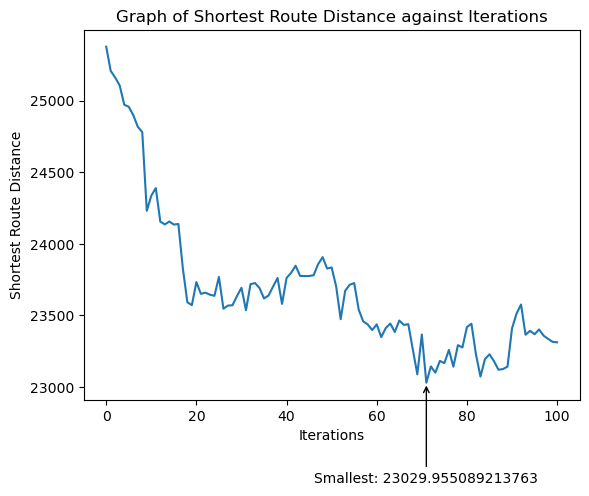

In [26]:
filename = "C:\\Users\\User\\Desktop\\Jupyter NoteBook\\AI_Week 7_Practical\\Lab_2_Genetic_Algorithm\\cities500.txt"
popSize = 20
eliteSize = 5
mutationProbability = 0.01
iteration_limit = 100
min_dist_list = [] # The list is added to gather the shortest route distance for each iteration

cityList = genCityList(filename)
population = initialPopulation(popSize, cityList)
distances = [Fitness(p).routeDistance() for p in population]
min_dist = min(distances)
min_dist_list.append(min_dist)
print("Best distance for initial population: " + str(min_dist))

for i in range(iteration_limit):
    population = oneGeneration(population, eliteSize, mutationProbability)
    distances = [Fitness(p).routeDistance() for p in population]
    index = np.argmin(distances)
    best_route = population[index]
    min_dist = min(distances)
    min_dist_list.append(min_dist)
    print("Best distance for population in iteration " + str(i) +
          ": " + str(min_dist))

print("Optimal path is " + str(best_route)) 

    # TODO 7 (10 marks) - Performance Evaluation. You will present the performance achieved 
    # by different parent selection function. You will compare the 
    # performance achieved by Random Selection, Tournament Selection, and Proportional Selection. 
   
    # Marking scheme: 
    # 7 to 10 marks:  In-depth performance evaluation. Optimal routes are found. 
    # 5 to <7 marks:  Clear understanding of performance evaluation.
    # >0 to <5 marks: Inaccurate or unclear understanding of performance evaluation. 
    # 0 marks:        No answer is given. 

# Plot the graph of shortest route distance against iterations    
iterations = list(range(0, 101))

# Shortest route distance as y-axis, Iterations as x-axis
plt.plot(iterations, min_dist_list)

# Labelling of the graph
plt.xlabel('Iterations')
plt.ylabel('Shortest Route Distance')
plt.title('Graph of Shortest Route Distance against Iterations')

# Annotation of the shortest route distance
min_index = np.argmin(min_dist_list)
min_value = min_dist_list[min_index]

plt.annotate(f'Smallest: {min_value}', xy=(min_index, min_value), xytext=(min_index, min_value - 700),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             ha='center')

# Displaying the graph
plt.show()
  